In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [2]:
print(os.getcwd())

D:\Kaggle\Titanic - Machine learning disaster


In [3]:
print(os.listdir())

['.ipynb_checkpoints', 'datasets', 'Titanic - Machine learning from disaster - code.ipynb', 'Titanic 2.ipynb']


In [4]:
train_data = pd.read_csv('datasets/train.csv')
test_data = pd.read_csv('datasets/test.csv')

In [5]:
print(train_data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [6]:
del train_data['PassengerId']
for feature in train_data:
    print(feature,np.round((train_data[feature].isnull().sum()*100)/len(train_data),4))

Survived 0.0
Pclass 0.0
Name 0.0
Sex 0.0
Age 19.8653
SibSp 0.0
Parch 0.0
Ticket 0.0
Fare 0.0
Cabin 77.1044
Embarked 0.2245


In [7]:
data = train_data.copy()
a =data['Embarked'].value_counts()
b = data.groupby('Embarked')['Survived']

In [8]:
print(a.index)

Index(['S', 'C', 'Q'], dtype='object')


In [9]:
embarked_survivals = []
embarked_died = []
for feature in b:
    sum = 0
    for i in feature[1]:
        sum+=i
    print(sum/len(feature[1]))
    
    embarked_survivals.append(sum/len(feature[1]))
    embarked_died.append((len(feature[1])-sum)/len(feature[1]))
    print((len(feature[1])-sum)/len(feature[1]))
    print(len(feature[1]))

0.5535714285714286
0.44642857142857145
168
0.38961038961038963
0.6103896103896104
77
0.33695652173913043
0.6630434782608695
644


In [10]:
print(embarked_survivals)

[0.5535714285714286, 0.38961038961038963, 0.33695652173913043]


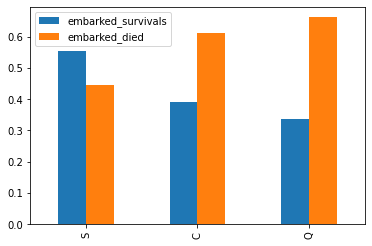

In [11]:
df = pd.DataFrame({'embarked_survivals':embarked_survivals,'embarked_died':embarked_died},index = a.index)
df.plot.bar()
plt.show()

In [12]:
np.where(train_data['Embarked'].isnull())

(array([ 61, 829], dtype=int64),)

In [14]:
train_data['Embarked'].fillna('Q',inplace=True)

In [15]:
for feature in train_data:
    print(feature,np.round((train_data[feature].isnull().sum()*100)/len(train_data),4))

Survived 0.0
Pclass 0.0
Name 0.0
Sex 0.0
Age 19.8653
SibSp 0.0
Parch 0.0
Ticket 0.0
Fare 0.0
Cabin 77.1044
Embarked 0.0


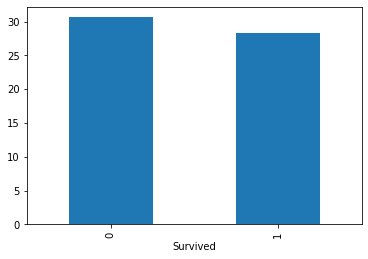

In [40]:
age = train_data.groupby('Survived')['Age'].mean().plot.bar()
plt.show()

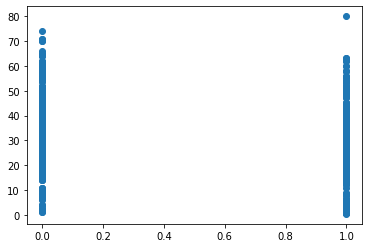

In [41]:
plt.scatter(train_data['Survived'],train_data['Age'])